# Import package library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import re
import joblib
import pickle
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./data-labeling.xlsx')

In [3]:
df.drop(df.columns[[0]], axis= 1,inplace=True)
df

,tweet_cleans,sentimen
0,istri gubernur jawa barat ridwan kamil atalia ...,negatif
1,vaksin covid anwar ibrahim tekan kerajaan,positif
2,covid thailand proses pemerolehan vaksin,positif
3,alhamdulillah vaksin covid yg sdh selwsai,positif
4,ilmuan mengklaim covid menjd endemik populasi ...,negatif
...,...,...
2595,video jokowi tolak nasionalisme vaksin covid a...,negatif
2596,otoritas australia bergabung negara menghentik...,negatif
2597,juta dosis vaksin astrazeneca indonesia juru b...,positif
2598,vaksin covid astrazeneca bermasalah eropa temu...,negatif


# Visualisasi bar-chart jumlah data tweet positif dan negatif

In [4]:
tweet_bar_df = df['sentimen'].value_counts()
print(f'index: {tweet_bar_df.index}')
print(f'values: {tweet_bar_df.values}')
print(f'all_values: {tweet_bar_df.sum()}')

index: Index(['positif', 'negatif'], dtype='object')
values: [2063  537]
all_values: 2600


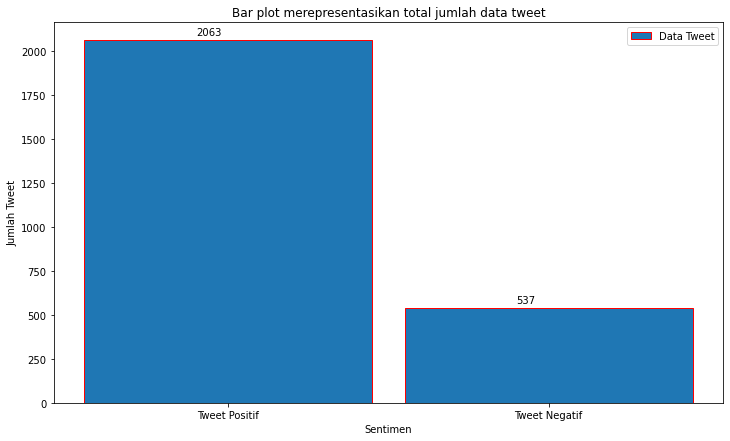

In [5]:
plt.figure(figsize = (12,7))

sentimen = ['Tweet Positif', 'Tweet Negatif']
plt.bar(sentimen, tweet_bar_df.values, align='center',  edgecolor = 'red', width= 0.9)


i = 1.0
j = 30

for i in range(len(sentimen)):
    plt.annotate(tweet_bar_df.values[i], (-0.1 + i, tweet_bar_df.values[i] + j))


plt.legend(labels = ['Data Tweet'])


plt.title("Bar plot merepresentasikan total jumlah data tweet")


plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')

# plt.savefig('barplot-tweet.png')

plt.show()

# Visualisasi pie-chart terhadap sentimen tweet

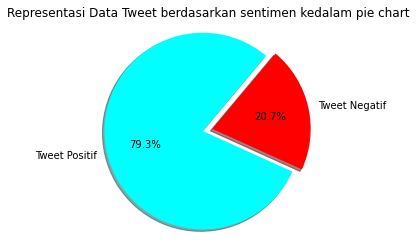

In [6]:
my_labels = 'Tweet Positif','Tweet Negatif'
my_colors = ['aqua','red']

my_explode = (0, 0.1)
plt.pie(tweet_bar_df.values, labels=my_labels, autopct='%1.1f%%', startangle=50, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Representasi Data Tweet berdasarkan sentimen kedalam pie chart')
plt.axis('equal')

plt.show()

# Wordcloud Data Positif

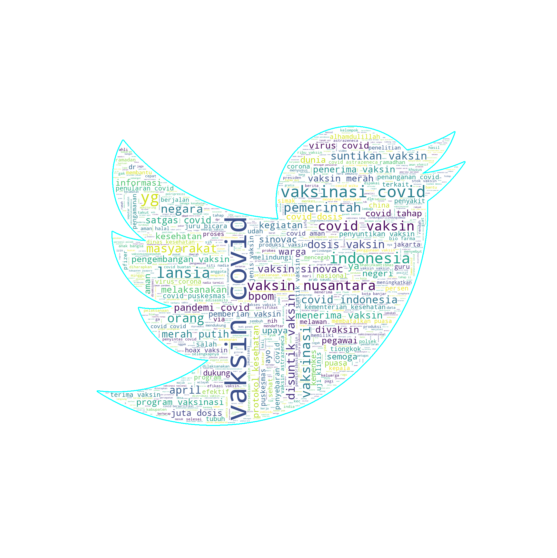

In [7]:
twitter_mask = np.array(Image.open("img/twitter-logo.png"))

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

transformed_twitter_mask = np.ndarray((twitter_mask.shape[0],twitter_mask.shape[1]), np.int32)
for i in range(len(twitter_mask)):
    transformed_twitter_mask[i] = list(map(transform_format, twitter_mask[i]))

tweet_positif = df[df['sentimen'] == 'positif']
all_text_positif = ' '.join(word for word in tweet_positif['tweet_cleans'])
wordcloud = WordCloud(width=1000, height=1000, background_color='White',
                      mask=transformed_twitter_mask, max_words=1000,
                      contour_width=3, contour_color='aqua').generate(all_text_positif)
wordcloud.to_file('img/wc-positif.png')

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

# Wordcloud Data Negatif

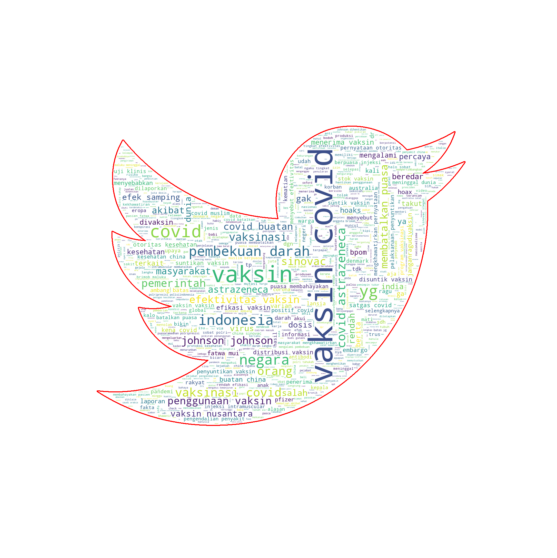

In [8]:
tweet_negatif = df[df['sentimen'] == 'negatif']
all_text_negatif = ' '.join(word for word in tweet_negatif['tweet_cleans'])
wordcloud = WordCloud(width=1000, height=1000, background_color='White',
                      mask=transformed_twitter_mask, max_words=1000,
                      contour_width=3, contour_color='red').generate(all_text_negatif)
wordcloud.to_file('img/wc-negatif.png')

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

# Melakukan konversi sentimen label jika positif == 1 dan jika negatif == 0

In [9]:
# melakukan konversi sentimen ke label 0 untuk negatif dan 1 untuk positif
def convert_label_sentimen(label_sentimen):
    if label_sentimen == "positif":
        return 1
    else:
        return 0

df['label_sentimen'] = df['sentimen'].apply(convert_label_sentimen)
df.shape

(2600, 3)

In [10]:
df

,tweet_cleans,sentimen,label_sentimen
0,istri gubernur jawa barat ridwan kamil atalia ...,negatif,0
1,vaksin covid anwar ibrahim tekan kerajaan,positif,1
2,covid thailand proses pemerolehan vaksin,positif,1
3,alhamdulillah vaksin covid yg sdh selwsai,positif,1
4,ilmuan mengklaim covid menjd endemik populasi ...,negatif,0
...,...,...,...
2595,video jokowi tolak nasionalisme vaksin covid a...,negatif,0
2596,otoritas australia bergabung negara menghentik...,negatif,0
2597,juta dosis vaksin astrazeneca indonesia juru b...,positif,1
2598,vaksin covid astrazeneca bermasalah eropa temu...,negatif,0


In [11]:
df.drop(df.columns[[1]], axis= 1,inplace=True)

In [12]:
df

,tweet_cleans,label_sentimen
0,istri gubernur jawa barat ridwan kamil atalia ...,0
1,vaksin covid anwar ibrahim tekan kerajaan,1
2,covid thailand proses pemerolehan vaksin,1
3,alhamdulillah vaksin covid yg sdh selwsai,1
4,ilmuan mengklaim covid menjd endemik populasi ...,0
...,...,...
2595,video jokowi tolak nasionalisme vaksin covid a...,0
2596,otoritas australia bergabung negara menghentik...,0
2597,juta dosis vaksin astrazeneca indonesia juru b...,1
2598,vaksin covid astrazeneca bermasalah eropa temu...,0


In [13]:
df['label_sentimen'].value_counts()

1    2063
0     537
Name: label_sentimen, dtype: int64

# Membagi data menjadi data training dan testing untuk melatih model algoritma

In [14]:
# spliting data
X_train, X_test, y_train, y_test = train_test_split(df['tweet_cleans'], 
                                                    df['label_sentimen'], test_size=0.2, stratify=df['label_sentimen'], random_state= 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2080,), (520,), (2080,), (520,))

# Pembobotan kata dengan TF-IDF menggunakan library TfidfVectorizer

In [15]:
tfidf_model = TfidfVectorizer(smooth_idf=False).fit(X_train)
X_train = tfidf_model.transform(X_train)
X_test = tfidf_model.transform(X_test)

# Klasifikasi Naive Bayes Classifier

In [16]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predict = mnb.predict(X_test)
print(predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

# Penyimpanan model

In [17]:
#simpan tfidf model
filename_tfidf = 'tfidf.pkl'
pickle.dump(tfidf_model, open(filename_tfidf, 'wb'))

In [18]:
# simpan naive bayes model
with open('model_analisis.pkl', 'wb') as r:
    pickle.dump(mnb, r)

# Confusion matrix model

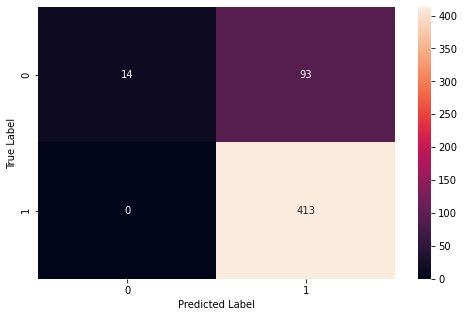

In [19]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Skor akurasi model

In [20]:
print('Hasil akurasi model : ')
print(accuracy_score(y_test, predict))

Hasil akurasi model : 
0.8211538461538461
